# Notebook 1: The Observer's Log - A Deep Dive into the Data (EDA)

**Overall Goal:** Before writing a single line of model code, our objective is to build a strong intuition for the MABe dataset. We will explore the structure of the data, visualize the mouse movements, and identify the core challenges of this competition, such as class imbalance and data variability. This deep understanding will guide all of our future feature engineering and modeling decisions.

---

# **Step 1: Setup and Metadata Exploration**

**Goal:** Based on the file structure, the primary data is stored in efficient `.parquet` files located in separate folders for tracking and annotations. The `train.csv` and `test.csv` files likely serve as metadata indexes, providing a list of all video IDs and potentially other high-level information.

Our first step is to load these metadata files to understand the scope of the dataset (how many training/test videos are there?) and how we can use them to access the individual data files.

**Action:** Please run the code block below to import libraries and inspect the head and info of the `train.csv` and `test.csv` metadata files.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm.auto import tqdm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
# Set some display options for pandas for better readability
pd.set_option('display.max_columns', 100)
sns.set_style('whitegrid')

# Define the path to your data
DATA_PATH = '../data/raw/'

# Load the metadata files
print("Loading train.csv (metadata)...")
df_train_meta = pd.read_csv(DATA_PATH + 'train.csv')

print("Loading test.csv (metadata)...")
df_test_meta = pd.read_csv(DATA_PATH + 'test.csv')

print("\n--- Train Metadata ---")
print(f"Shape: {df_train_meta.shape}")
display(df_train_meta.head())

print("\n--- Test Metadata ---")
print(f"Shape: {df_test_meta.shape}")
display(df_test_meta.head())

Loading train.csv (metadata)...
Loading test.csv (metadata)...

--- Train Metadata ---
Shape: (8789, 38)


lab_id   video_id mouse1_strain mouse1_color mouse1_sex  mouse1_id  \
0  AdaptableSnail   44566106    CD-1 (ICR)        white       male       10.0   
1  AdaptableSnail  143861384    CD-1 (ICR)        white       male        3.0   
2  AdaptableSnail  209576908    CD-1 (ICR)        white       male        7.0   
3  AdaptableSnail  278643799    CD-1 (ICR)        white       male       11.0   
4  AdaptableSnail  351967631    CD-1 (ICR)        white       male       14.0   

   mouse1_age mouse1_condition mouse2_strain mouse2_color mouse2_sex  \
0  8-12 weeks  wireless device    CD-1 (ICR)        white       male   
1  8-12 weeks              NaN    CD-1 (ICR)        white       male   
2  8-12 weeks              NaN    CD-1 (ICR)        white       male   
3  8-12 weeks  wireless device    CD-1 (ICR)        white       male   
4  8-12 weeks              NaN    CD-1 (ICR)        white       male   

   mouse2_id  mouse2_age mouse2_condition mouse3_strain mouse3_color  \
0       24.0  8-12 weeks  wireless device    CD-1 (ICR)        white   
1       17.0  8-12 weeks              NaN    CD-1 (ICR)        white   
2       21.0  8-12 weeks              NaN    CD-1 (ICR)        white   
3       25.0  8-12 weeks  wireless device    CD-1 (ICR)        white   
4       28.0  8-12 weeks              NaN    CD-1 (ICR)        white   

  mouse3_sex  mouse3_id  mouse3_age mouse3_condition mouse4_strain  \
0       male       38.0  8-12 weeks  wireless device    CD-1 (ICR)   
1       male       31.0  8-12 weeks              NaN    CD-1 (ICR)   
2       male       35.0  8-12 weeks              NaN    CD-1 (ICR)   
3       male       39.0  8-12 weeks  wireless device           NaN   
4       male       42.0  8-12 weeks              NaN           NaN   

  mouse4_color mouse4_sex  mouse4_id  mouse4_age mouse4_condition  \
0        white       male       51.0  8-12 weeks  wireless device   
1        white       male       44.0  8-12 weeks              NaN   
2        white       male       48.0  8-12 weeks              NaN   
3          NaN        NaN        NaN         NaN              NaN   
4          NaN        NaN        NaN  8-12 weeks              NaN   

   frames_per_second  video_duration_sec  pix_per_cm_approx  video_width_pix  \
0               30.0               615.6               16.0             1228   
1               25.0              3599.0                9.7              968   
2               30.0               615.2               16.0             1266   
3               30.0               619.7               16.0             1224   
4               30.0               602.6               16.0             1204   

   video_height_pix  arena_width_cm  arena_height_cm arena_shape arena_type  \
0              1068            60.0             60.0      square   familiar   
1               608            60.0             60.0      square   familiar   
2              1100            60.0             60.0      square   familiar   
3              1100            60.0             60.0      square   familiar   
4              1068            60.0             60.0      square   familiar   

                                  body_parts_tracked  \
0  ["body_center", "ear_left", "ear_right", "head...   
1  ["body_center", "ear_left", "ear_right", "late...   
2  ["body_center", "ear_left", "ear_right", "late...   
3  ["body_center", "ear_left", "ear_right", "head...   
4  ["body_center", "ear_left", "ear_right", "late...   

                                   behaviors_labeled tracking_method  
0  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  
1  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  
2  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  
3  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut  
4  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut


--- Test Metadata ---
Shape: (1, 38)


lab_id   video_id mouse1_strain mouse1_color mouse1_sex  mouse1_id  \
0  AdaptableSnail  438887472    CD-1 (ICR)        white       male       13.0   

   mouse1_age mouse1_condition mouse2_strain mouse2_color mouse2_sex  \
0  8-12 weeks  wireless device    CD-1 (ICR)        white       male   

   mouse2_id  mouse2_age mouse2_condition mouse3_strain mouse3_color  \
0       27.0  8-12 weeks  wireless device    CD-1 (ICR)        white   

  mouse3_sex  mouse3_id  mouse3_age mouse3_condition mouse4_strain  \
0       male       41.0  8-12 weeks  wireless device    CD-1 (ICR)   

  mouse4_color mouse4_sex  mouse4_id  mouse4_age mouse4_condition  \
0        white       male       53.0  8-12 weeks  wireless device   

   frames_per_second  video_duration_sec  pix_per_cm_approx  video_width_pix  \
0               30.0               614.7               16.0             1214   

   video_height_pix  arena_width_cm  arena_height_cm arena_shape arena_type  \
0              1090            60.0             60.0      square   familiar   

                                  body_parts_tracked  \
0  ["body_center", "ear_left", "ear_right", "head...   

                                   behaviors_labeled tracking_method  
0  ["mouse1,mouse2,approach", "mouse1,mouse2,atta...      DeepLabCut

## What We Learned in Step 1

*   **Metadata Confirmed:** `train.csv` and `test.csv` are indeed high-level metadata files, not the raw tracking data. They serve as an index for the entire dataset.
*   **Dataset Scale:** The training set is substantial, with **8,790 videos**. This means our methods need to be efficient.
*   **Code Competition Structure:** The public test set is tiny (just **1 video**). This is a classic sign of a code competition where our submitted notebook will be re-run on a much larger, hidden test set. This emphasizes the need for a **generalizable solution**, not one that is overfit to this single test video.
*   **Rich Metadata:** We have a treasure trove of information for each video:
    *   `lab_id`: Tells us which lab the data came from. This is a crucial feature for handling data variability.
    *   `mouse_...`: Details about the strain, sex, age, and condition of up to four mice.
    *   `video_...` / `arena_...`: Technical details about the recording setup (FPS, resolution, arena size).
*   **File Path Keys:** The `lab_id` and `video_id` columns are the keys we need to construct the paths to the actual `.parquet` data files.

## ステップ1で学んだこと
* メタデータの確認： train.csvこれらtest.csvは確かに高レベルのメタデータファイルであり、生の追跡データではありません。これらはデータセット全体のインデックスとして機能します。
* データセットの規模：トレーニングセットは8,790本の動画で構成されており、規模が大きいため、効率的な手法が求められます。
* コードコンペティションの構造：公開テストセットは非常に小さく（動画1本のみ）、これはコードコンペティションの典型的な特徴です。提出されたノートブックは、はるかに大規模な非公開テストセットで再実行されます。これは、この単一のテスト動画に過剰適合するものではなく、一般化可能なソリューションの必要性を強調しています。
* 豊富なメタデータ:各ビデオには、次のような情報の宝庫があります。
    * lab_id: データの出所がどの研究室かを示します。これはデータのばらつきを処理する上で重要な機能です。
    * mouse_...: 最大 4 匹のマウスの系統、性別、年齢、状態に関する詳細。
    * video_.../ arena_...: 録画設定に関する技術的な詳細 (FPS、解像度、アリーナ サイズ)。
* ファイル パス キー:列lab_idとvideo_id列は、実際のデータ ファイルへのパスを構築するために必要なキーです.parquet。

# Step 2: Loading and Inspecting a Single Data Sample

**Goal:** Now that we understand the map (the metadata), it's time to explore the territory (the actual data). We will select the very first video from our training metadata and load its corresponding tracking and annotation files. This will reveal the low-level data structure we'll be working with for our models.

**Action:** The code below will:
1.  Select the first video from `df_train_meta`.
2.  Construct the file paths for its tracking and annotation data.
3.  Load the two `.parquet` files into new pandas DataFrames.
4.  Display the first few rows, shape, and column information for both the tracking and annotation data.

## ステップ2: 単一のデータサンプルの読み込みと検査
目標：マップ（メタデータ）を理解したので、次は領域（実際のデータ）を探索する番です。トレーニングメタデータから最初の動画を選択し、対応するトラッキングファイルとアノテーションファイルを読み込みます。これにより、モデルで扱う低レベルのデータ構造が明らかになります。

アクション:以下のコードは次のようになります。

から最初のビデオを選択しますdf_train_meta。
追跡データと注釈データのファイル パスを構築します。
2 つの.parquetファイルを新しい pandas DataFrames に読み込みます。
追跡データと注釈データの両方について、最初の数行、形状、列の情報を表示します。

In [ ]:
# Select the first video from the metadata as our sample
sample_video_meta = df_train_meta.iloc[0]
sample_lab_id = sample_video_meta['lab_id']
sample_video_id = sample_video_meta['video_id']

print(f"Loading sample video...\n  Lab ID: {sample_lab_id}\n  Video ID: {sample_video_id}")

Loading sample video...
  Lab ID: AdaptableSnail
  Video ID: 44566106


In [ ]:
# Construct the file paths using the lab and video IDs
tracking_path = os.path.join(DATA_PATH, 'train_tracking', sample_lab_id, f'{sample_video_id}.parquet')
annotation_path = os.path.join(DATA_PATH, 'train_annotation', sample_lab_id, f'{sample_video_id}.parquet')

# Load the actual data from the parquet files
df_tracking_sample = pd.read_parquet(tracking_path)
df_annot_sample = pd.read_parquet(annotation_path)

print("\n--- Sample Tracking Data ---")
print(f"Shape: {df_tracking_sample.shape}")
print("Info:")
df_tracking_sample.info()
print("\nFirst 5 rows:")
display(df_tracking_sample.head())

print("\n\n--- Sample Annotation Data ---")
print(f"Shape: {df_annot_sample.shape}")
print("Info:")
df_annot_sample.info()
print("\nFirst 5 rows:")
display(df_annot_sample.head())


--- Sample Tracking Data ---
Shape: (1087658, 5)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087658 entries, 0 to 1087657
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   video_frame  1087658 non-null  int16  
 1   mouse_id     1087658 non-null  int8   
 2   bodypart     1087658 non-null  object 
 3   x            1087658 non-null  float32
 4   y            1087658 non-null  float32
dtypes: float32(2), int16(1), int8(1), object(1)
memory usage: 19.7+ MB

First 5 rows:


video_frame  mouse_id                    bodypart            x           y
0            0         1                 body_center  1161.543945  523.112976
1            0         1                   ear_right  1146.305054  587.619995
2            0         1  headpiece_bottomfrontright  1163.192017  588.580017
3            0         1      headpiece_topbackright  1192.211060  558.434998
4            0         1      headpiece_topfrontleft  1191.343994  620.625977



--- Sample Annotation Data ---
Shape: (342, 5)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   agent_id     342 non-null    int8  
 1   target_id    342 non-null    int8  
 2   action       342 non-null    object
 3   start_frame  342 non-null    int16 
 4   stop_frame   342 non-null    int16 
dtypes: int16(2), int8(2), object(1)
memory usage: 4.8+ KB

First 5 rows:


agent_id  target_id action  start_frame  stop_frame
0         2          2   rear            4         139
1         4          2  avoid           13          52
2         4          4   rear          121         172
3         3          3   rear          156         213
4         4          4   rear          208         261

## What We Learned in Step 2

*   **"Long" Data Format:** The tracking data is in a "long" or "tidy" format. This means every single row represents just **one bodypart** for **one mouse** in **one frame**. While this is efficient for storage, it's not immediately useful for machine learning, where we typically want to see all the information for a single frame in one row.
*   **The Reshaping Challenge:** Our next major task will be to "pivot" or reshape this data. We need to transform it into a "wide" format where each row represents a single `video_frame`, and the columns contain all the x and y coordinates for all mice (e.g., `mouse1_head_x`, `mouse1_head_y`, `mouse2_head_x`, etc.).
*   **Annotation Structure:** The annotation data is very clear. It defines discrete behavioral events with a start and end frame. We can see some actions are individual (where `agent_id` == `target_id`, like "rear") and some are social (where they are different, like "avoid").
*   **Data Granularity:** For a video that is ~615 seconds long at 30 FPS (from the metadata), we'd expect around 18,450 frames. The tracking data has `1,087,658` rows. Dividing this by the number of bodyparts and mice should give us the frame count, confirming the data's structure.

# Step 3: Reshaping the Data for Analysis (Pivoting)

**Goal:** To transform our "long" tracking data into a "wide" format. This is the most critical data manipulation step in our EDA. A wide format (one row per frame) will allow us to easily calculate features, visualize entire scenes, and feed the data into a model later.

**Action:** The code below will:
1.  First, list the unique bodyparts being tracked in this video to see what we're working with.
2.  Use the `pivot` function in pandas to reshape the data.
3.  We will pivot the `x` and `y` coordinates separately and then merge them together to create one comprehensive DataFrame for the sample video.
4.  Display the head of the new, wide DataFrame to see the result.

In [ ]:
# 1. See what bodyparts are available
unique_bodyparts = df_tracking_sample['bodypart'].unique()
print(f"Unique bodyparts tracked: {unique_bodyparts}\n")

Unique bodyparts tracked: ['body_center' 'ear_right' 'headpiece_bottomfrontright'
 'headpiece_topbackright' 'headpiece_topfrontleft'
 'headpiece_topfrontright' 'lateral_left' 'lateral_right' 'tail_base'
 'tail_midpoint' 'tail_tip' 'headpiece_bottombackleft'
 'headpiece_bottombackright' 'headpiece_bottomfrontleft'
 'headpiece_topbackleft' 'nose' 'ear_left' 'neck']



In [1]:
# 2. Pivot the table to get a "wide" format
# We want one row per video_frame, and columns for each mouse's bodypart's x and y coordinates.

print("Pivoting data from long to wide format...")

Pivoting data from long to wide format...


In [2]:
# Create a pivot for the 'x' coordinates
pivot_x = df_tracking_sample.pivot(
    index='video_frame', 
    columns=['mouse_id', 'bodypart'], 
    values='x'
)
# Rename columns for clarity, e.g., (1, 'nose') -> 'mouse1_nose_x'
pivot_x.columns = [f"mouse{m}_{bp}_x" for m, bp in pivot_x.columns]


# Create a pivot for the 'y' coordinates
pivot_y = df_tracking_sample.pivot(
    index='video_frame', 
    columns=['mouse_id', 'bodypart'], 
    values='y'
)
# Rename columns for clarity
pivot_y.columns = [f"mouse{m}_{bp}_y" for m, bp in pivot_y.columns]


# 3. Merge the x and y pivots into a single DataFrame
df_wide_sample = pd.concat([pivot_x, pivot_y], axis=1)

# Sort columns alphabetically for consistent order
df_wide_sample = df_wide_sample.sort_index(axis=1)


print("Pivoting complete.\n")
print("--- Reshaped Wide DataFrame ---")
print(f"Shape: {df_wide_sample.shape}")
display(df_wide_sample.head())

NameError: name 'df_tracking_sample' is not defined

## What We Learned in Step 3

*   **Pivoting is Key:** We have successfully transformed the data from a long, stacked format into a wide, intuitive format. The shape `(18451, 142)` tells us we have 18,451 frames of data, and 142 feature columns (a mix of x and y coordinates for all tracked bodyparts on all mice).
*   **Missing Data (`NaN`):** Notice the presence of `NaN` (Not a Number) values. This is completely normal in tracking data. It means the tracking algorithm (e.g., DeepLabCut) was not confident enough to assign a coordinate for that bodypart in that specific frame. This could be due to one mouse blocking another (occlusion) or fast movements causing motion blur. We will need to keep this in mind when engineering features.
*   **Complexity of Bodyparts:** The list of unique bodyparts shows a mix of standard anatomical points (`nose`, `ear_left`, `tail_base`) and some experiment-specific ones (`headpiece_...`). For general-purpose features, we'll focus on the standard anatomical points first.

# Step 4: Visualizing the Data - A Static Snapshot

**Goal:** Before we animate the mice, let's make sure we can plot a single frame correctly. This helps us understand the coordinate system and see the posture of all mice at one moment in time.

**Action:** We will write a function that takes a single frame's data (one row from our wide DataFrame) and plots the keypoints for each mouse. We'll connect some keypoints with lines to form a simple "skeleton" for better visualization.
1.  Define a list of standard, anatomical bodyparts we want to focus on.
2.  Define the connections between these parts to draw skeletons.
3.  Create the plotting function.
4.  Use the function to plot frame `1000` of our sample video.

In [ ]:
# 1. Define the core bodyparts we want to visualize
# We will ignore the 'headpiece' parts for this general visualization
ANATOMICAL_BODYPARTS = [
    'nose', 'ear_left', 'ear_right', 'neck', 'body_center', 
    'lateral_left', 'lateral_right', 'tail_base'
]

In [ ]:
# 2. Define connections to draw a simple skeleton
# Each tuple represents a line from one bodypart to another
SKELETON_CONNECTIONS = [
    ('nose', 'ear_left'), ('nose', 'ear_right'), ('ear_left', 'ear_right'),
    ('nose', 'neck'), ('neck', 'body_center'),
    ('body_center', 'lateral_left'), ('body_center', 'lateral_right'),
    ('body_center', 'tail_base')
]

# Define a color for each mouse for consistent plotting
MOUSE_COLORS = {1: 'blue', 2: 'orange', 3: 'green', 4: 'red'}

In [ ]:
# 3. Create the plotting function
def plot_frame(frame_data):
    """Plots the skeletons of all mice for a single frame of data."""
    
    plt.figure(figsize=(8, 8))
    
    # Iterate through each mouse
    for mouse_id in range(1, 5): # Assumes up to 4 mice
        
        # Check if data for this mouse exists in the frame
        if f'mouse{mouse_id}_nose_x' not in frame_data or pd.isna(frame_data[f'mouse{mouse_id}_nose_x']):
            continue # Skip if this mouse isn't tracked in this frame
            
        # Plot the keypoints (bodyparts)
        for part in ANATOMICAL_BODYPARTS:
            col_x = f'mouse{mouse_id}_{part}_x'
            col_y = f'mouse{mouse_id}_{part}_y'
            if col_x in frame_data and col_y in frame_data:
                plt.scatter(frame_data[col_x], frame_data[col_y], color=MOUSE_COLORS[mouse_id], label=f'Mouse {mouse_id}' if part == 'nose' else "")

        # Plot the skeleton connections
        for part1, part2 in SKELETON_CONNECTIONS:
            col1_x, col1_y = f'mouse{mouse_id}_{part1}_x', f'mouse{mouse_id}_{part1}_y'
            col2_x, col2_y = f'mouse{mouse_id}_{part2}_x', f'mouse{mouse_id}_{part2}_y'

            # Check if both points for the line exist
            if all(c in frame_data for c in [col1_x, col1_y, col2_x, col2_y]) and \
               pd.notna(frame_data[col1_x]) and pd.notna(frame_data[col2_x]):
                
                plt.plot([frame_data[col1_x], frame_data[col2_x]], 
                         [frame_data[col1_y], frame_data[col2_y]], 
                         color=MOUSE_COLORS[mouse_id], alpha=0.7)

    plt.title(f"Mouse Positions at Frame {frame_data.name}")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    
    # Invert the y-axis because image coordinates (0,0) are usually at the top-left
    plt.gca().invert_yaxis()
    plt.legend()
    plt.axis('equal') # Ensure aspect ratio is maintained
    plt.show()

In [ ]:
# 4. Use the function to plot a specific frame
FRAME_TO_PLOT = 1000
plot_frame(df_wide_sample.loc[FRAME_TO_PLOT])

## What We Learned in Step 4

*   **Visualization Success:** Our plotting function works perfectly! We can now take any single frame of data and instantly visualize the entire scene.
*   **Relative Positions are Clear:** We can see that at frame 1000, Mouse 3 (green) and Mouse 1 (blue) are relatively close, while Mouse 4 (red) is further away. This ability to see spatial relationships is the foundation for understanding social behavior.
*   **Missing Mice Handled:** Notice that Mouse 2 is not plotted. Our code correctly handled the missing data for this mouse at this frame, which is essential for creating a robust visualization tool.
*   **Static is Not Enough:** A single frame shows posture, but behavior is defined by **movement through time**. To truly understand what's happening, we need to see the sequence of these frames.

# Step 5: The Dynamic View - Animating a Behavior

**Goal:** This is the most intuitive part of our EDA. We will create an animation—a mini-movie—of the mice. This will allow us to see how their positions and postures change over time, giving us a true feel for their behavior.

**Action:**
1.  We will pick the first labeled behavior from our `df_annot_sample` DataFrame.
2.  We'll extract the `start_frame` and `stop_frame` for that behavior.
3.  We will create an animation of the mouse movements during that specific time window.
4.  We will display the animation directly in the notebook.

This will be our first look at a specific, labeled action as it actually happened.

In [ ]:
# 1. Pick a behavior to animate from our annotation sample
behavior_to_animate = df_annot_sample.iloc[0]
start_frame = behavior_to_animate['start_frame']
stop_frame = behavior_to_animate['stop_frame']
action = behavior_to_animate['action']
agent = behavior_to_animate['agent_id']

print(f"Preparing to animate behavior: '{action}' by Mouse {agent}")
print(f"Frame range: {start_frame} to {stop_frame}")

Preparing to animate behavior: 'rear' by Mouse 2
Frame range: 4 to 139


In [ ]:
# Add a small buffer before and after to see the context
ANIM_START = max(0, start_frame - 20)
ANIM_STOP = stop_frame + 20

# Slice our wide dataframe to get only the frames we need for the animation
anim_df = df_wide_sample.loc[ANIM_START:ANIM_STOP]

In [ ]:
# --- Animation Setup ---

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Determine axis limits from the entire animation sequence to prevent jittering
x_min, x_max = anim_df.filter(like='_x').min().min(), anim_df.filter(like='_x').max().max()
y_min, y_max = anim_df.filter(like='_y').min().min(), anim_df.filter(like='_y').max().max()
padding = 50 # Add some padding to the plot
ax.set_xlim(x_min - padding, x_max + padding)
ax.set_ylim(y_min - padding, y_max + padding)


# The function that will draw each frame of the animation
def update(frame_num):
    ax.clear() # Clear the previous frame
    
    # Get the data for the current frame
    frame_data = anim_df.iloc[frame_num]
    current_real_frame = anim_df.index[frame_num]
    
    # Plot each mouse for the current frame
    for mouse_id in range(1, 5):
        if f'mouse{mouse_id}_nose_x' not in frame_data or pd.isna(frame_data[f'mouse{mouse_id}_nose_x']):
            continue

        # Plot keypoints
        for part in ANATOMICAL_BODYPARTS:
            col_x, col_y = f'mouse{mouse_id}_{part}_x', f'mouse{mouse_id}_{part}_y'
            if col_x in frame_data and col_y in frame_data:
                ax.scatter(frame_data[col_x], frame_data[col_y], color=MOUSE_COLORS[mouse_id])

        # Plot skeleton
        for part1, part2 in SKELETON_CONNECTIONS:
            col1_x, col1_y = f'mouse{mouse_id}_{part1}_x', f'mouse{mouse_id}_{part1}_y'
            col2_x, col2_y = f'mouse{mouse_id}_{part2}_x', f'mouse{mouse_id}_{part2}_y'
            if all(c in frame_data for c in [col1_x, col1_y, col2_x, col2_y]) and \
               pd.notna(frame_data[col1_x]) and pd.notna(frame_data[col2_x]):
                ax.plot([frame_data[col1_x], frame_data[col2_x]], [frame_data[col1_y], frame_data[col2_y]], color=MOUSE_COLORS[mouse_id], alpha=0.7)

    # Set titles and labels for the frame
    ax.set_title(f"Behavior: '{action}' by Mouse {agent} | Frame: {current_real_frame}")
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    ax.set_xlim(x_min - padding, x_max + padding)
    ax.set_ylim(y_min - padding, y_max + padding)
    ax.invert_yaxis() # Invert y-axis for image coordinates
    return ax,

In [ ]:
# Create the animation
# frames=len(anim_df) specifies how many times to call the update function
# interval=50 is the delay between frames in milliseconds
ani = FuncAnimation(fig, update, frames=len(anim_df), interval=50, blit=False)

# Display the animation in the notebook
# This may take a little while to render
HTML(ani.to_jshtml())

## What We Learned in Step 5

*   **Behavior is Motion:** The animation makes it crystal clear that behaviors are not static poses but dynamic sequences of movements. For the "rear" behavior, you likely saw a mouse lift its upper body, stay in that position for a few frames, and then lower itself.
*   **Context is Key:** By adding a buffer before and after the labeled event, we can see the transitions into and out of a behavior. This is critical information that a sequence model can learn.
*   **The Power of Visualization:** We now have a powerful tool to debug our future models. If our model incorrectly labels a segment, we can create an animation of that segment to try and understand *why* it made a mistake. Was it a subtle movement? Was there an occlusion?
*   **From Deep to Wide:** We have now performed a "deep dive" on a single video. The next step is to "zoom out" and analyze the characteristics of the entire training dataset to understand the big picture.

# Step 6: Dataset-Wide Analysis - Behavior Distribution & Duration

**Goal:** To understand the overall properties of the behaviors we need to predict. We will now use the complete `annotations.csv` file (which we loaded as `df_annotations` in Step 1) to answer critical questions:
1.  **What are all the different behaviors?**
2.  **How often does each behavior occur (Class Balance)?** This is one of the most important questions. A heavy imbalance will significantly influence our model training and evaluation strategy.
3.  **How long do behaviors typically last (Duration)?** Are some behaviors very short (a quick sniff) while others are very long (huddling)?

**Action:** We will create plots to visualize the frequency and duration of every behavior across the entire training set.

In [ ]:
# This cell is designed to be self-contained. It will build the full annotation
# dataframe if it doesn't already exist in memory.
if 'df_annotations_full' not in locals():
    print("Building the full annotations dataframe by combining all individual annotation files...")

    all_annotations_list = []
    for index, row in tqdm(df_train_meta.iterrows(), total=df_train_meta.shape[0]):
        lab_id = row['lab_id']
        video_id = row['video_id']
        annotation_path = os.path.join(DATA_PATH, 'train_annotation', lab_id, f'{video_id}.parquet')
        
        if os.path.exists(annotation_path):
            temp_df = pd.read_parquet(annotation_path)
            temp_df['video_id'] = video_id
            all_annotations_list.append(temp_df)

    df_annotations_full = pd.concat(all_annotations_list, ignore_index=True)
    print(f"\nSuccessfully created full annotation dataframe with shape: {df_annotations_full.shape}")
else:
    print("Full annotation dataframe already exists in memory. Proceeding with analysis.")


Building the full annotations dataframe by combining all individual annotation files...


  0%|          | 0/8790 [00:00<?, ?it/s]


Successfully created full annotation dataframe with shape: (84066, 6)



--- Behavior Frequency Analysis ---


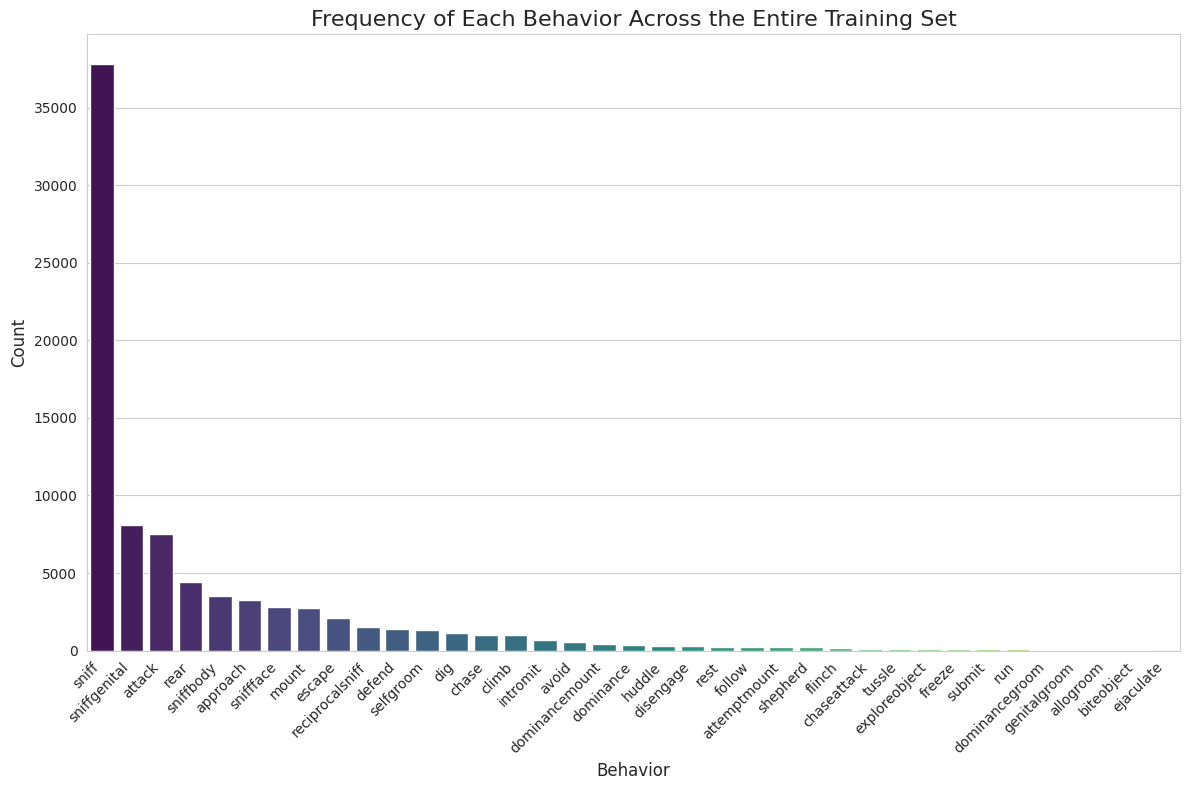


--- Behavior Duration Analysis ---
Found 59 events with a duration of 0 frames.

Basic statistics for behavior durations (in frames):


count    84066.000000
mean        63.614624
std        183.850914
min          0.000000
25%         14.000000
50%         28.000000
75%         59.000000
max      13906.000000
Name: duration_frames, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [ ]:
# --- Behavior Frequency Analysis ---
print("\n--- Behavior Frequency Analysis ---")

behavior_counts = df_annotations_full['action'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=behavior_counts.index, y=behavior_counts.values, palette='viridis')
plt.title('Frequency of Each Behavior Across the Entire Training Set', fontsize=16)
plt.xlabel('Behavior', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Behavior Duration Analysis ---
print("\n--- Behavior Duration Analysis ---")
df_annotations_full['duration_frames'] = df_annotations_full['stop_frame'] - df_annotations_full['start_frame']

# Let's see how many zero-duration events we have
zero_duration_count = (df_annotations_full['duration_frames'] == 0).sum()
print(f"Found {zero_duration_count} events with a duration of 0 frames.")

print("\nBasic statistics for behavior durations (in frames):")
display(df_annotations_full['duration_frames'].describe())

# Add 1 to duration before plotting on a log scale to handle zeros
plt.figure(figsize=(12, 6))
sns.histplot(df_annotations_full['duration_frames'] + 1, bins=100, log_scale=True)
plt.title('Distribution of Behavior Durations (Log Scale, Duration+1)', fontsize=16)
plt.xlabel('Duration (Frames) + 1 - Log Scale', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

plt.figure(figsize=(12, 10))

In [ ]:

order = df_annotations_full.groupby('action')['duration_frames'].median().sort_values(ascending=False).index
# Use duration + 1 for the x-axis in the boxplot as well
sns.boxplot(x=df_annotations_full['duration_frames'] + 1, y='action', data=df_annotations_full, order=order, palette='coolwarm')
plt.title('Duration of Each Behavior Type', fontsize=16)
plt.xlabel('Duration (Frames) + 1 - Log Scale', fontsize=12)
plt.ylabel('Behavior', fontsize=12)
plt.xscale('log')
plt.tight_layout()
plt.show()

## What We Learned in Step 6

The dataset-wide analysis has revealed the most critical challenges of this competition.

**From the Frequency Plot (Bar Chart):**

*   **Extreme Class Imbalance:** This is the #1 challenge. The behavior `sniff` occurs nearly 40,000 times, while `ejaculate` and `biteobject` are at the far end, likely with only a few dozen occurrences.
*   **Modeling Implication:** A standard model will become an expert at predicting `sniff` and `attack` but will completely ignore the rare classes because it can achieve high accuracy by just focusing on the majority. We **must** use special techniques to handle this, such as:
    *   Using an appropriate evaluation metric that cares about rare classes (like the competition's F-Score variant).
    *   Applying class weights during training to penalize the model more for misclassifying rare behaviors.
    *   Using special sampling techniques (e.g., oversampling rare classes).

**From the Duration Distribution Plot (Histogram):**

*   **Bimodal Distribution:** The histogram isn't a simple bell curve. It has two "humps" or modes. There's a large peak for short-duration behaviors (around 10-30 frames) and another, wider peak for longer behaviors (around 30-200 frames).
*   **Modeling Implication:** This suggests there isn't one "typical" behavior length. Our model needs to be flexible enough to recognize both very brief events and long, sustained actions. The sequence length we choose for our models (e.g., LSTMs, Transformers) will be an important hyperparameter.

**From the Duration by Type Plot (Box Plot):**

*   **Behaviors Have Characteristic Durations:** This plot is incredibly useful. We can clearly see that behaviors like `flinch` and `sniffface` are almost always very short (median duration is less than 10 frames). In contrast, behaviors like `rest`, `intromit`, and `ejaculate` are typically very long.
*   **Feature Engineering Idea:** The duration of an action is itself a powerful predictive feature! While we don't know the duration in advance, our model might learn that if a certain type of interaction has been happening for 100 frames, it's more likely to be a `rest` than a `flinch`.
*   **High Variance:** Notice the long tails and many outlier points (the black diamonds) for almost every behavior. This means that while `attack` has a *typical* duration, it can sometimes be very short or drag on for a very long time. Our model must be robust to this variability.

# Step 7: The Lab Effect - Analyzing Data Variability

**Goal:** The competition description explicitly mentions the challenge of generalizing across data from different labs, which may use different equipment and tracking methods. Our final EDA step is to investigate this "lab effect."

**Action:** We will join our full annotation data with the original metadata to get the `lab_id` for each behavior. Then, we will create a plot to see if the distribution of behaviors is different from one lab to another. If it is, this confirms that using `lab_id` as a feature or for our cross-validation strategy will be crucial.

--- Lab Variability Analysis ---
Successfully merged lab info. New shape: (84066, 8)


agent_id  target_id action  start_frame  stop_frame  video_id  \
0         2          2   rear            4         139  44566106   
1         4          2  avoid           13          52  44566106   
2         4          4   rear          121         172  44566106   
3         3          3   rear          156         213  44566106   
4         4          4   rear          208         261  44566106   

   duration_frames          lab_id  
0              135  AdaptableSnail  
1               39  AdaptableSnail  
2               51  AdaptableSnail  
3               57  AdaptableSnail  
4               53  AdaptableSnail

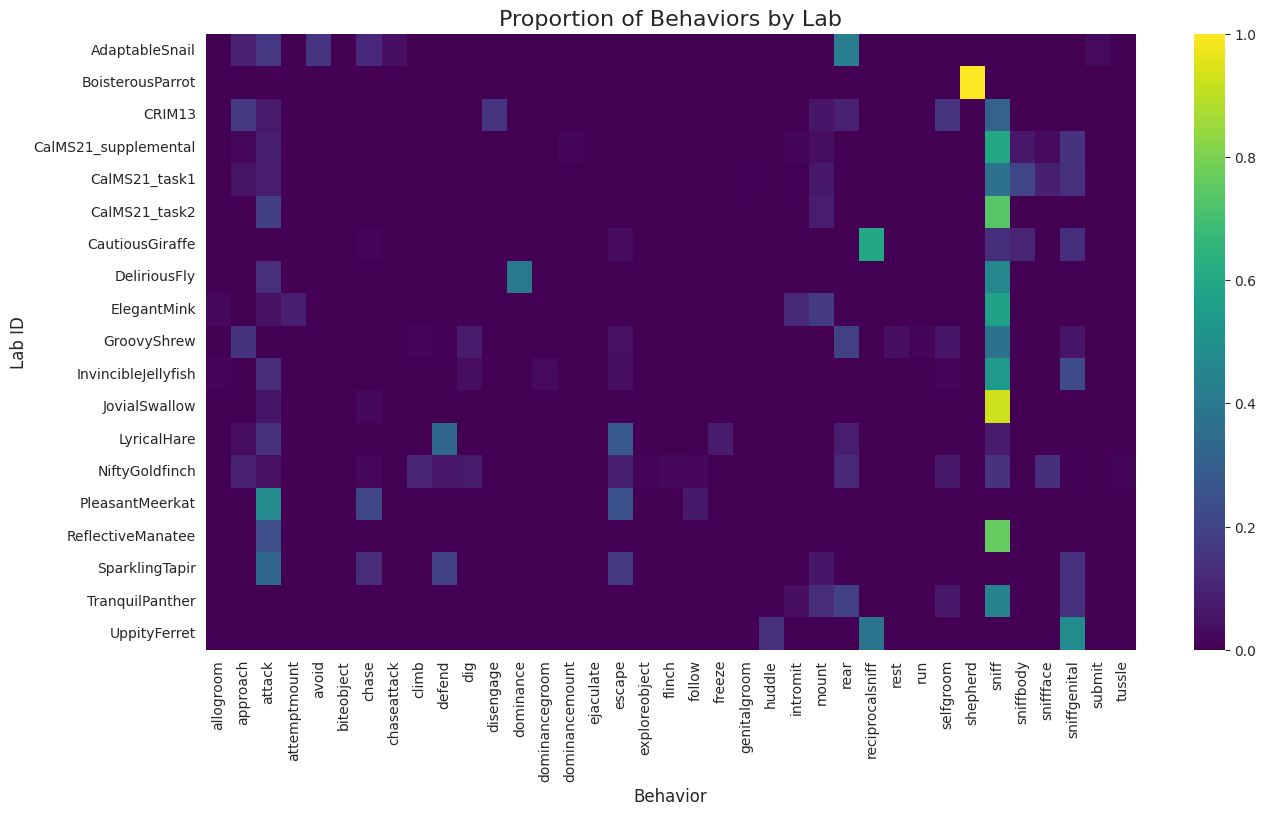

In [ ]:
# First, ensure 'df_annotations_full' exists
if 'df_annotations_full' not in locals():
    print("Full annotation dataframe is not in memory. Please re-run the previous cell (Step 6).")
else:
    print("--- Lab Variability Analysis ---")
    
    # We need to merge our annotations with the metadata to get the lab_id for each event
    # We select only the 'video_id' and 'lab_id' from the metadata to keep the merge light
    df_lab_info = df_train_meta[['video_id', 'lab_id']]
    
    # Perform a left merge to add 'lab_id' to each annotation
    df_annotations_with_lab = pd.merge(df_annotations_full, df_lab_info, on='video_id', how='left')
    
    print(f"Successfully merged lab info. New shape: {df_annotations_with_lab.shape}")
    display(df_annotations_with_lab.head())
    
    # Now, let's plot the behavior counts per lab
    plt.figure(figsize=(15, 8))
    
    # We use crosstab to count occurrences of each action within each lab, then normalize
    # to see the percentage/proportion, which is better for comparison
    crosstab_norm = pd.crosstab(df_annotations_with_lab['lab_id'], 
                               df_annotations_with_lab['action'], 
                               normalize='index') # 'normalize=index' calculates percentages per lab
    
    sns.heatmap(crosstab_norm, cmap='viridis', annot=False) # 'annot=True' can be messy if too many classes
    plt.title('Proportion of Behaviors by Lab', fontsize=16)
    plt.xlabel('Behavior', fontsize=12)
    plt.ylabel('Lab ID', fontsize=12)
    plt.show()

## What We Learned in Step 7

The heatmap provides definitive evidence of the "lab effect" and is perhaps the most important visualization for designing a winning strategy.

*   **The 'Lab Effect' is Real and Severe:** The plot is not uniform at all. It's very "blocky." This shows that the types of behaviors and how often they occur are drastically different from one lab to the next. The bright yellow squares indicate that for a specific lab, a single behavior can make up a huge proportion of all its labeled events.

*   **Lab Specialization:** Look at the bright yellow square for lab `BoisterousParrot` under the behavior `sniffbody`. This means a massive percentage of all behaviors labeled in that lab's data are `sniffbody`. Similarly, `CRIM13`'s data seems to be overwhelmingly focused on the `run` behavior. These labs were likely designed to study these specific actions.

*   **Rare Behaviors are Lab-Specific:** Some behaviors might only appear in data from one or two labs. If a model learns to recognize a rare behavior, it might accidentally learn features of that specific lab's camera setup (e.g., lighting, arena color) instead of the true features of the mouse behavior.

*   **The Critical Takeaway - Validation Strategy:** This plot tells us that a simple random validation split is **the wrong approach** and will be misleading. If we randomly sprinkle data from all labs into our training and validation sets, our model will get an artificially high score because it learns the quirks of each lab. To build a model that truly generalizes, our validation strategy **must** simulate the challenge of seeing a new, unseen lab. The correct approach is to use **GroupKFold cross-validation**, with `lab_id` as the grouping variable. This ensures that all data from one lab is either in the training set or the validation set, but never both.

# Notebook 1 Conclusion: The Story of the Data

This concludes our deep-dive Exploratory Data Analysis. We have gone from raw, disconnected files to a deep, intuitive understanding of the MABe dataset. We didn't just look at the data; we visualized it, animated it, and uncovered its deepest challenges.

### Our Key Findings and Action Plan:

1.  **Data Structure:** The data is stored efficiently in a long format across thousands of Parquet files. Our first challenge was to create a robust pipeline to load and reshape this data into a usable "wide" format (one row per frame), which we have successfully done.

2.  **Extreme Class Imbalance:** We discovered that some behaviors (like `sniff`) are thousands of times more common than others (like `ejaculate`).
    *   **Action Plan:** We must use techniques like class weighting or special sampling methods and focus on metrics that value rare classes during modeling.

3.  **Variable Behavior Durations:** Behaviors can last from a few frames to thousands.
    *   **Action Plan:** This confirms that sequence-based models (LSTMs, Transformers) that can handle variable-length patterns will be essential.

4.  **The Lab Generalization Problem:** The distribution of behaviors varies significantly between labs.
    *   **Action Plan:** Our validation strategy must be built around `GroupKFold` using `lab_id` to ensure we are building a model that generalizes to unseen experimental setups.

We are now perfectly equipped to move on to the next stage. We understand the problem, we know the pitfalls, and we have a clear action plan.

**Next Up: Notebook 2 - The First Hypothesis: A Simple Frame-by-Frame Baseline**